## Predict Student Grades (Regression) Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,Female,1st Year,2.5,1,170,NaN,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,Male,12th,3.4,1,123,NaN,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,Male,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,Female,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,Other,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low


# EDA

In [4]:
df.shape

(8000, 26)

In [5]:
df.describe()

,student_id,age,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,last_exam_score,...,attendance_percentage,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed
count,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,18.96725,3.286938,0.641000,88.989875,5.515125,50.057500,59.359500,5.472375,59.501250,...,69.852112,5.484750,5.516450,10.127325,6.465025,3.010600,2.523387,5.463375,56.811988,0.889250
std,2309.54541,3.15316,1.582171,0.479737,52.184077,2.883064,29.440109,34.869496,2.872067,23.161888,...,17.234339,2.898546,2.586377,17.479288,1.435670,1.744974,1.436991,2.881917,13.455724,0.313842
min,1.00000,14.00000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,...,40.000000,1.000000,1.000000,-20.000000,4.000000,0.000000,0.000000,1.000000,12.700000,0.000000
25%,2000.75000,16.00000,1.900000,0.000000,43.000000,3.000000,25.000000,29.000000,3.000000,39.750000,...,54.800000,3.000000,3.200000,-5.000000,5.200000,1.500000,1.300000,3.000000,47.300000,1.000000
50%,4000.50000,19.00000,3.300000,1.000000,89.000000,6.000000,50.000000,59.000000,6.000000,59.000000,...,70.000000,5.000000,5.500000,10.150000,6.400000,3.000000,2.500000,5.000000,56.900000,1.000000
75%,6000.25000,22.00000,4.600000,1.000000,134.000000,8.000000,76.000000,90.000000,8.000000,80.000000,...,84.600000,8.000000,7.800000,25.500000,7.700000,4.500000,3.800000,8.000000,66.200000,1.000000
max,8000.00000,24.00000,6.000000,1.000000,179.000000,10.000000,100.000000,119.000000,10.000000,99.000000,...,100.000000,10.000000,10.000000,40.000000,9.000000,6.000000,5.000000,10.000000,95.800000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   student_id                       8000 non-null   int64  
 1   age                              8000 non-null   int64  
 2   gender                           8000 non-null   object 
 3   grade_level                      8000 non-null   object 
 4   study_hours_per_day              8000 non-null   float64
 5   uses_ai                          8000 non-null   int64  
 6   ai_usage_time_minutes            8000 non-null   int64  
 7   ai_tools_used                    6638 non-null   object 
 8   ai_usage_purpose                 6654 non-null   object 
 9   ai_dependency_score              8000 non-null   int64  
 10  ai_generated_content_percentage  8000 non-null   int64  
 11  ai_prompts_per_week              8000 non-null   int64  
 12  ai_ethics_score     

In [7]:
df.isnull().sum().sort_values(ascending=False)

ai_tools_used                      1362
ai_usage_purpose                   1346
age                                   0
student_id                            0
gender                                0
grade_level                           0
uses_ai                               0
study_hours_per_day                   0
ai_usage_time_minutes                 0
ai_dependency_score                   0
ai_generated_content_percentage       0
ai_prompts_per_week                   0
ai_ethics_score                       0
last_exam_score                       0
assignment_scores_avg                 0
attendance_percentage                 0
concept_understanding_score           0
study_consistency_index               0
improvement_rate                      0
sleep_hours                           0
social_media_hours                    0
tutoring_hours                        0
class_participation_score             0
final_score                           0
passed                                0


<Axes: xlabel='ai_tools_used', ylabel='count'>

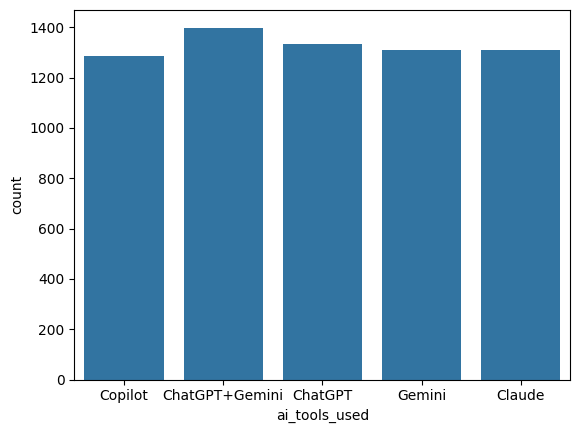

In [8]:
sns.countplot(x="ai_tools_used", data=df)

In [9]:
df.dtypes

student_id                           int64
age                                  int64
gender                              object
grade_level                         object
study_hours_per_day                float64
uses_ai                              int64
ai_usage_time_minutes                int64
ai_tools_used                       object
ai_usage_purpose                    object
ai_dependency_score                  int64
ai_generated_content_percentage      int64
ai_prompts_per_week                  int64
ai_ethics_score                      int64
last_exam_score                      int64
assignment_scores_avg              float64
attendance_percentage              float64
concept_understanding_score          int64
study_consistency_index            float64
improvement_rate                   float64
sleep_hours                        float64
social_media_hours                 float64
tutoring_hours                     float64
class_participation_score            int64
final_score

In [10]:
df.columns

Index(['student_id', 'age', 'gender', 'grade_level', 'study_hours_per_day',
       'uses_ai', 'ai_usage_time_minutes', 'ai_tools_used', 'ai_usage_purpose',
       'ai_dependency_score', 'ai_generated_content_percentage',
       'ai_prompts_per_week', 'ai_ethics_score', 'last_exam_score',
       'assignment_scores_avg', 'attendance_percentage',
       'concept_understanding_score', 'study_consistency_index',
       'improvement_rate', 'sleep_hours', 'social_media_hours',
       'tutoring_hours', 'class_participation_score', 'final_score', 'passed',
       'performance_category'],
      dtype='object')

In [11]:
numerical_cols = ['student_id', 'age', 'study_hours_per_day',
       'uses_ai', 'ai_usage_time_minutes',
       'ai_dependency_score', 'ai_generated_content_percentage',
       'ai_prompts_per_week', 'ai_ethics_score', 'last_exam_score',
       'assignment_scores_avg', 'attendance_percentage',
       'concept_understanding_score', 'study_consistency_index',
       'improvement_rate', 'sleep_hours', 'social_media_hours',
       'tutoring_hours', 'class_participation_score', 'final_score', 'passed']

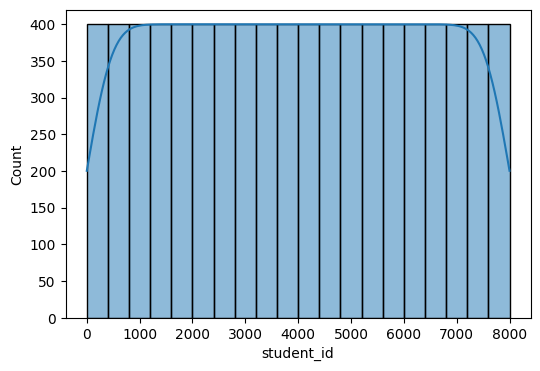

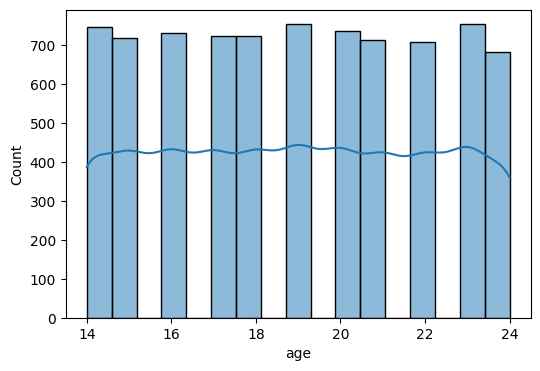

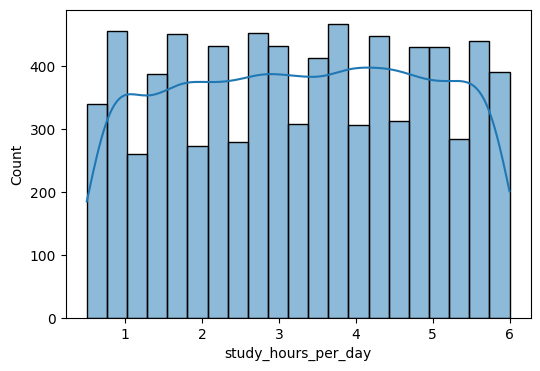

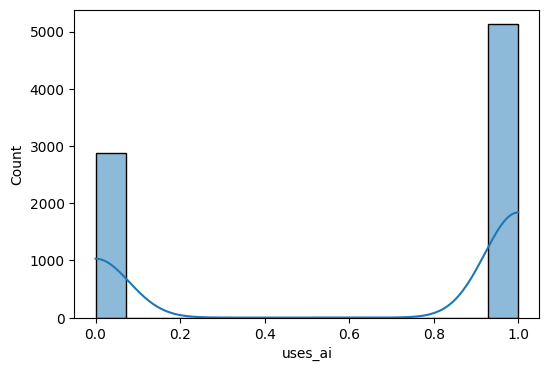

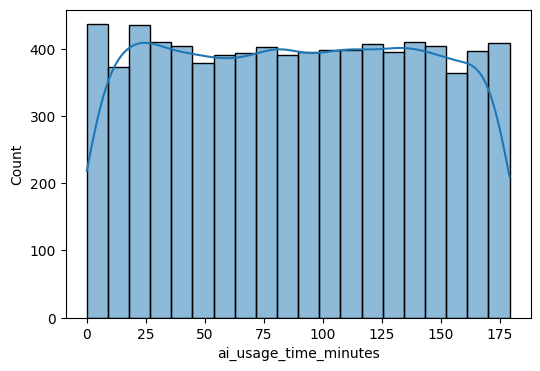

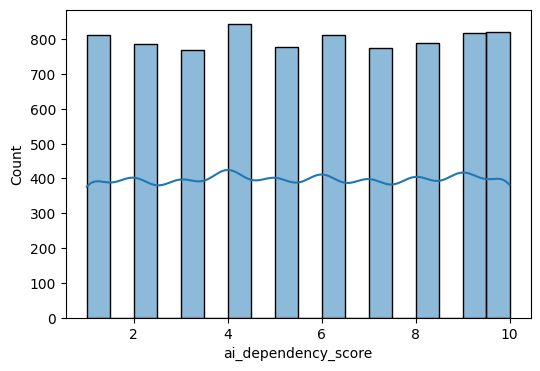

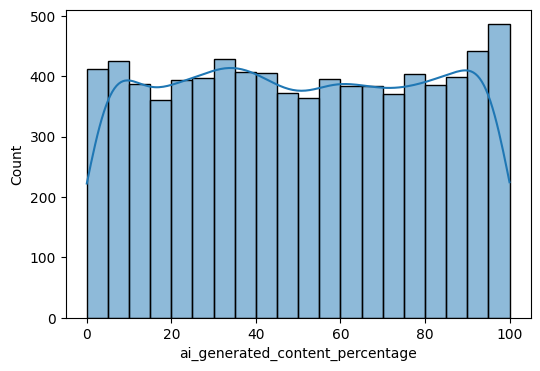

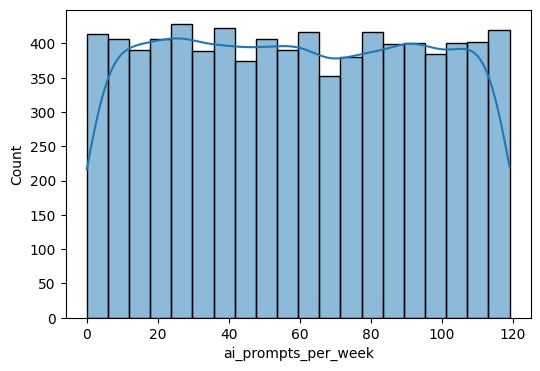

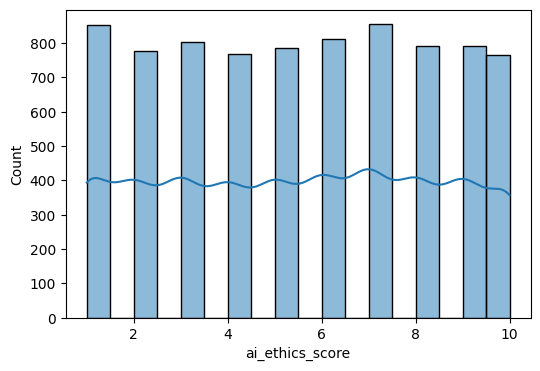

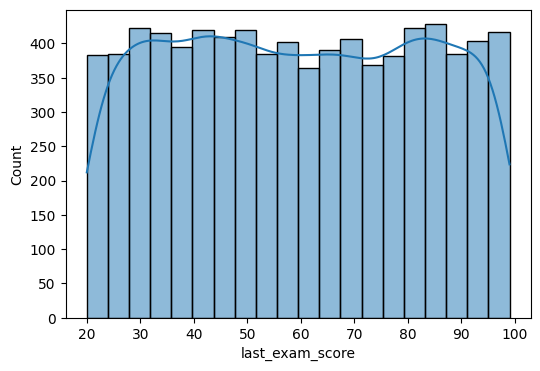

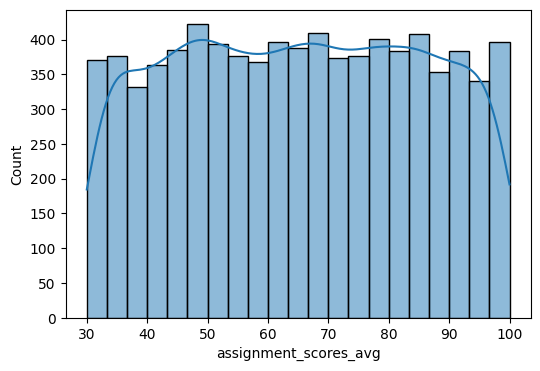

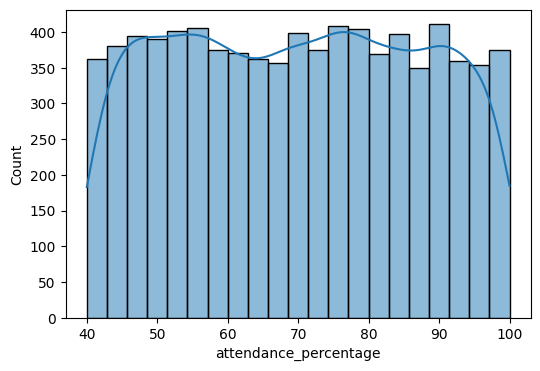

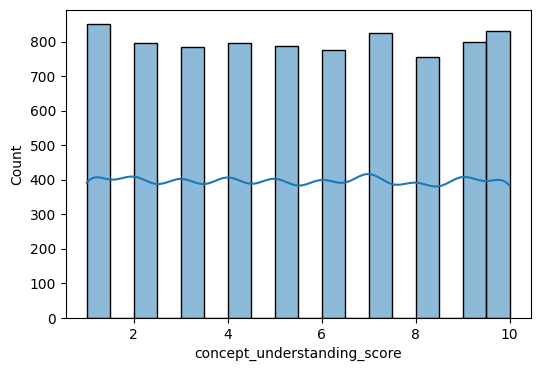

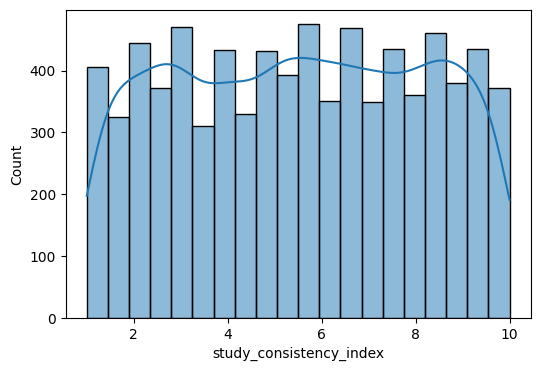

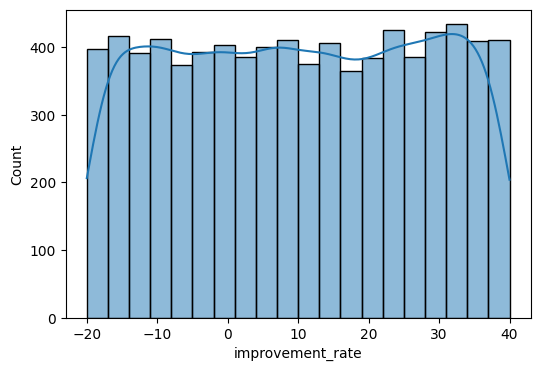

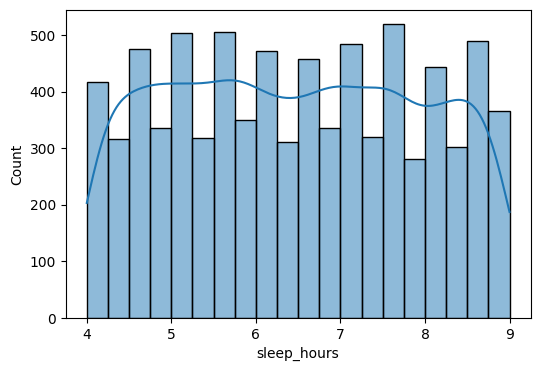

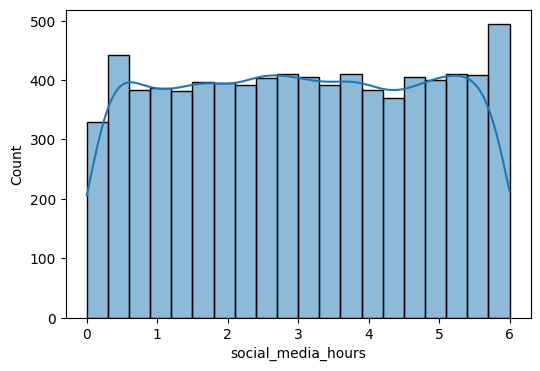

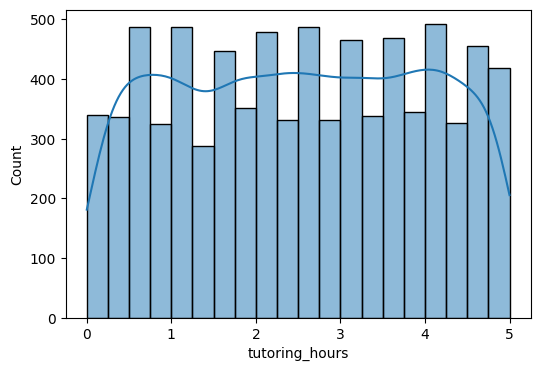

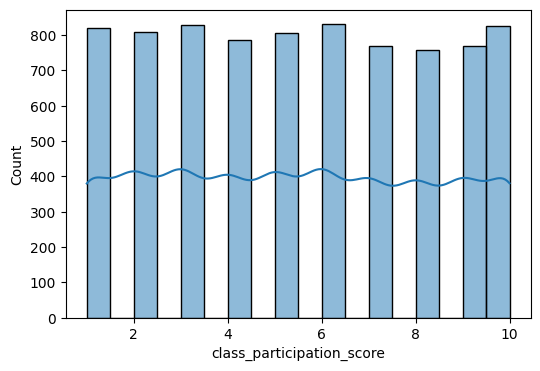

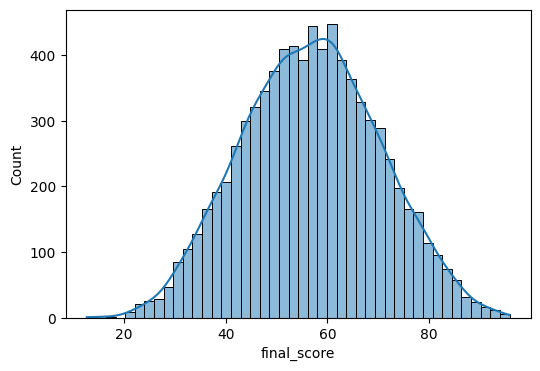

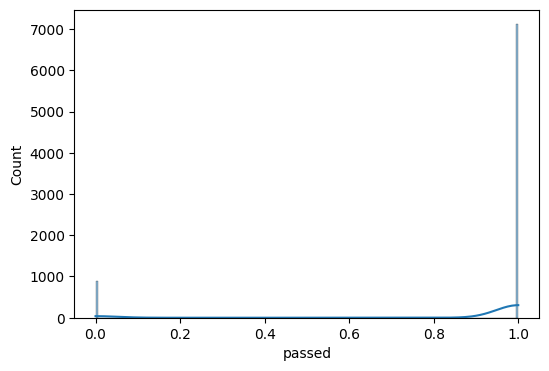

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)

In [13]:
df.isnull().sum().sort_values(ascending=False)

ai_tools_used                      1362
ai_usage_purpose                   1346
age                                   0
student_id                            0
gender                                0
grade_level                           0
uses_ai                               0
study_hours_per_day                   0
ai_usage_time_minutes                 0
ai_dependency_score                   0
ai_generated_content_percentage       0
ai_prompts_per_week                   0
ai_ethics_score                       0
last_exam_score                       0
assignment_scores_avg                 0
attendance_percentage                 0
concept_understanding_score           0
study_consistency_index               0
improvement_rate                      0
sleep_hours                           0
social_media_hours                    0
tutoring_hours                        0
class_participation_score             0
final_score                           0
passed                                0


In [14]:
df.dtypes

student_id                           int64
age                                  int64
gender                              object
grade_level                         object
study_hours_per_day                float64
uses_ai                              int64
ai_usage_time_minutes                int64
ai_tools_used                       object
ai_usage_purpose                    object
ai_dependency_score                  int64
ai_generated_content_percentage      int64
ai_prompts_per_week                  int64
ai_ethics_score                      int64
last_exam_score                      int64
assignment_scores_avg              float64
attendance_percentage              float64
concept_understanding_score          int64
study_consistency_index            float64
improvement_rate                   float64
sleep_hours                        float64
social_media_hours                 float64
tutoring_hours                     float64
class_participation_score            int64
final_score

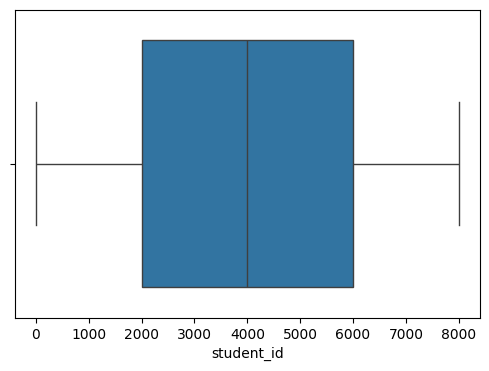

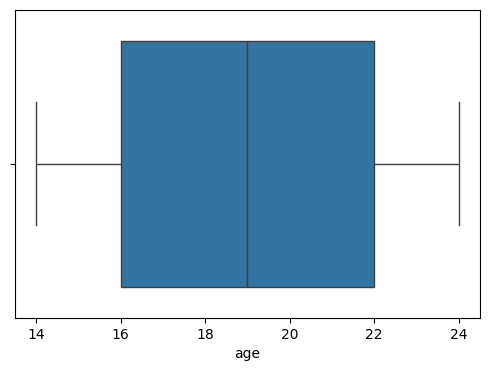

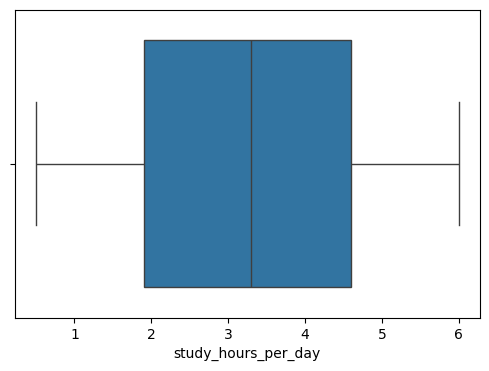

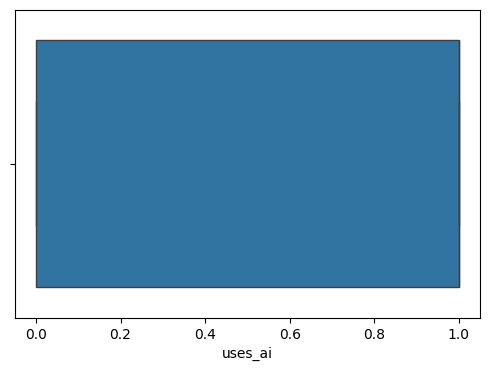

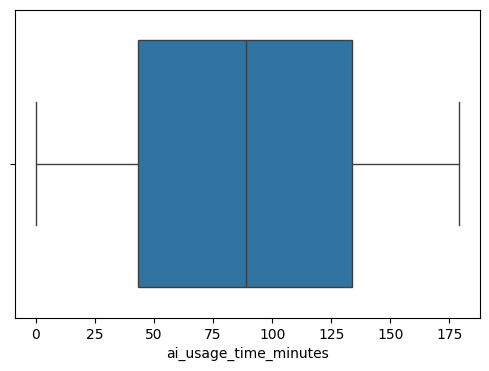

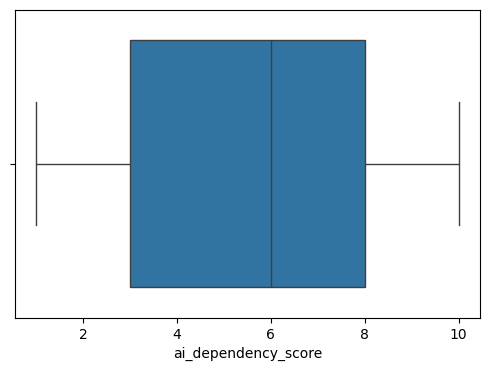

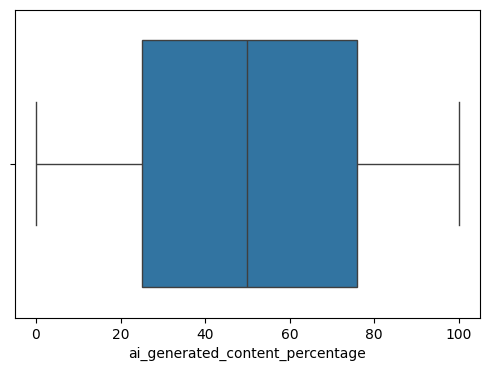

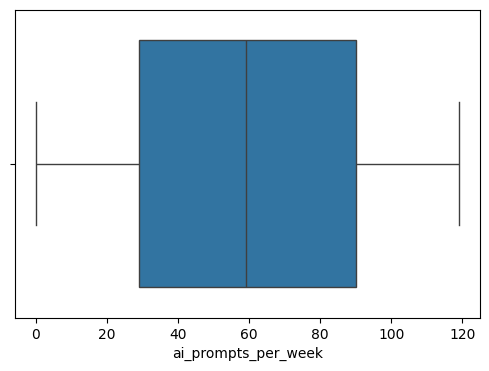

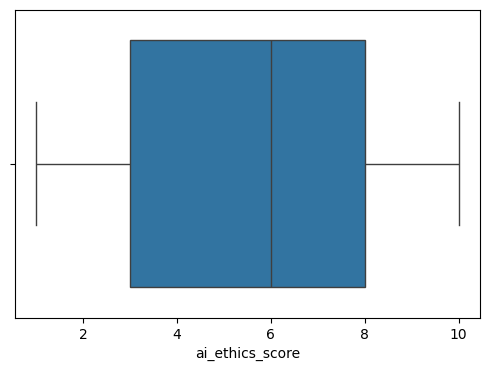

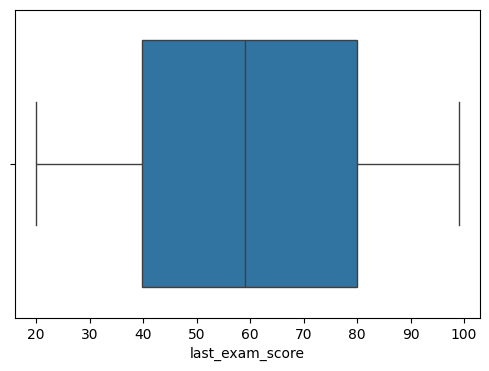

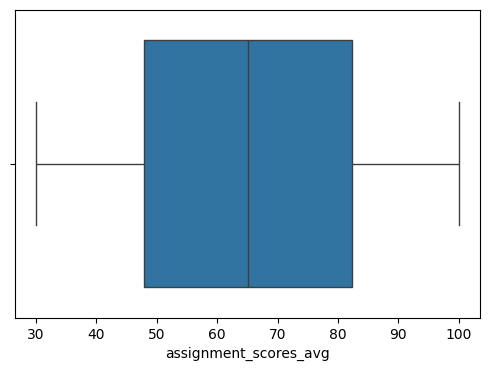

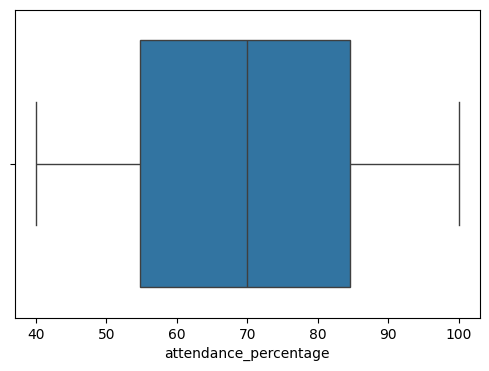

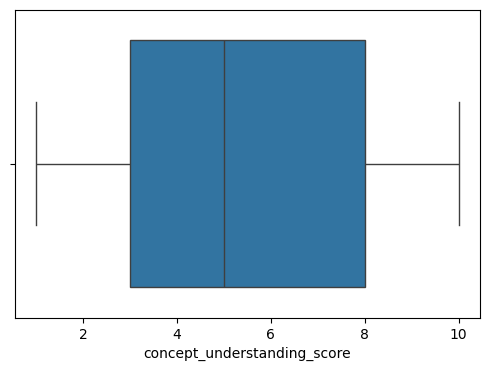

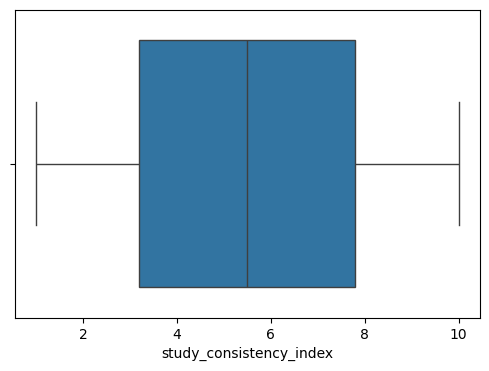

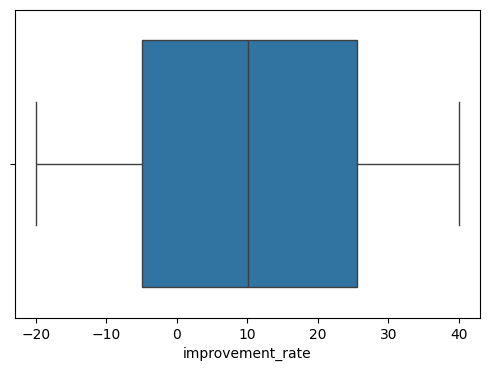

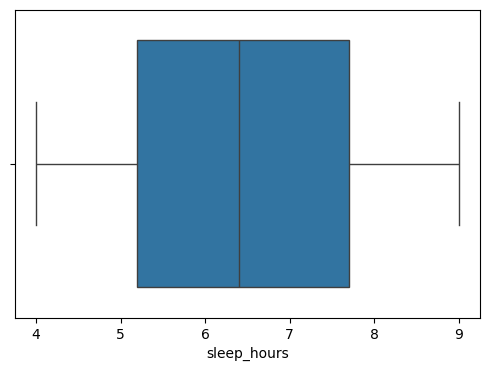

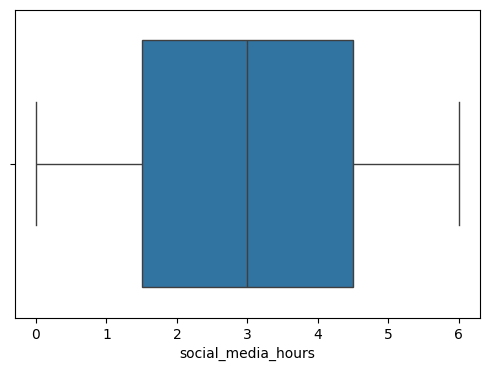

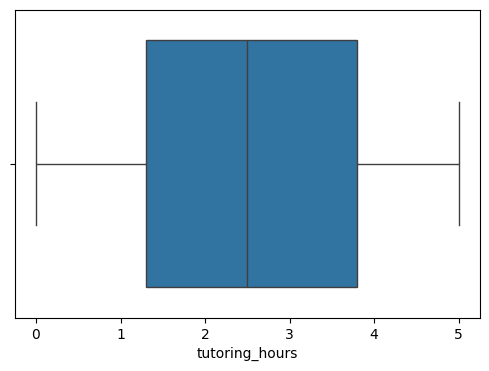

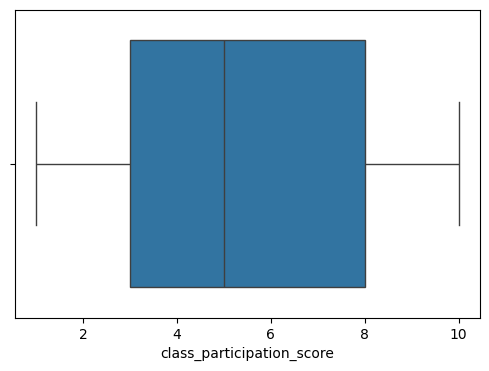

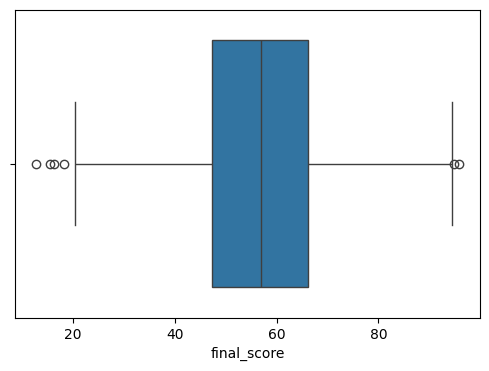

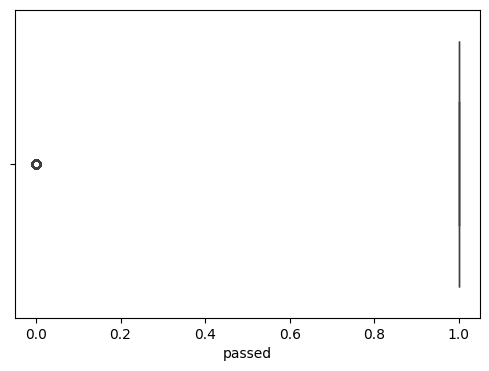

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])

In [16]:
df["final_score"].value_counts

<bound method IndexOpsMixin.value_counts of 0       36.8
1       65.5
2       66.3
3       69.5
4       49.7
        ... 
7995    49.7
7996    58.4
7997    69.1
7998    49.2
7999    69.7
Name: final_score, Length: 8000, dtype: float64>

<Axes: xlabel='final_score', ylabel='Count'>

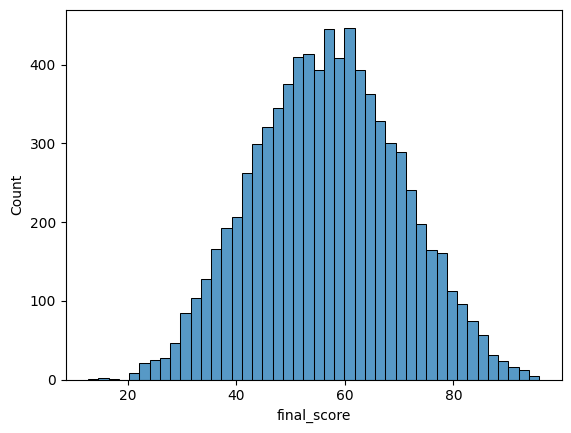

In [17]:
sns.histplot(x="final_score",data=df)

<Axes: >

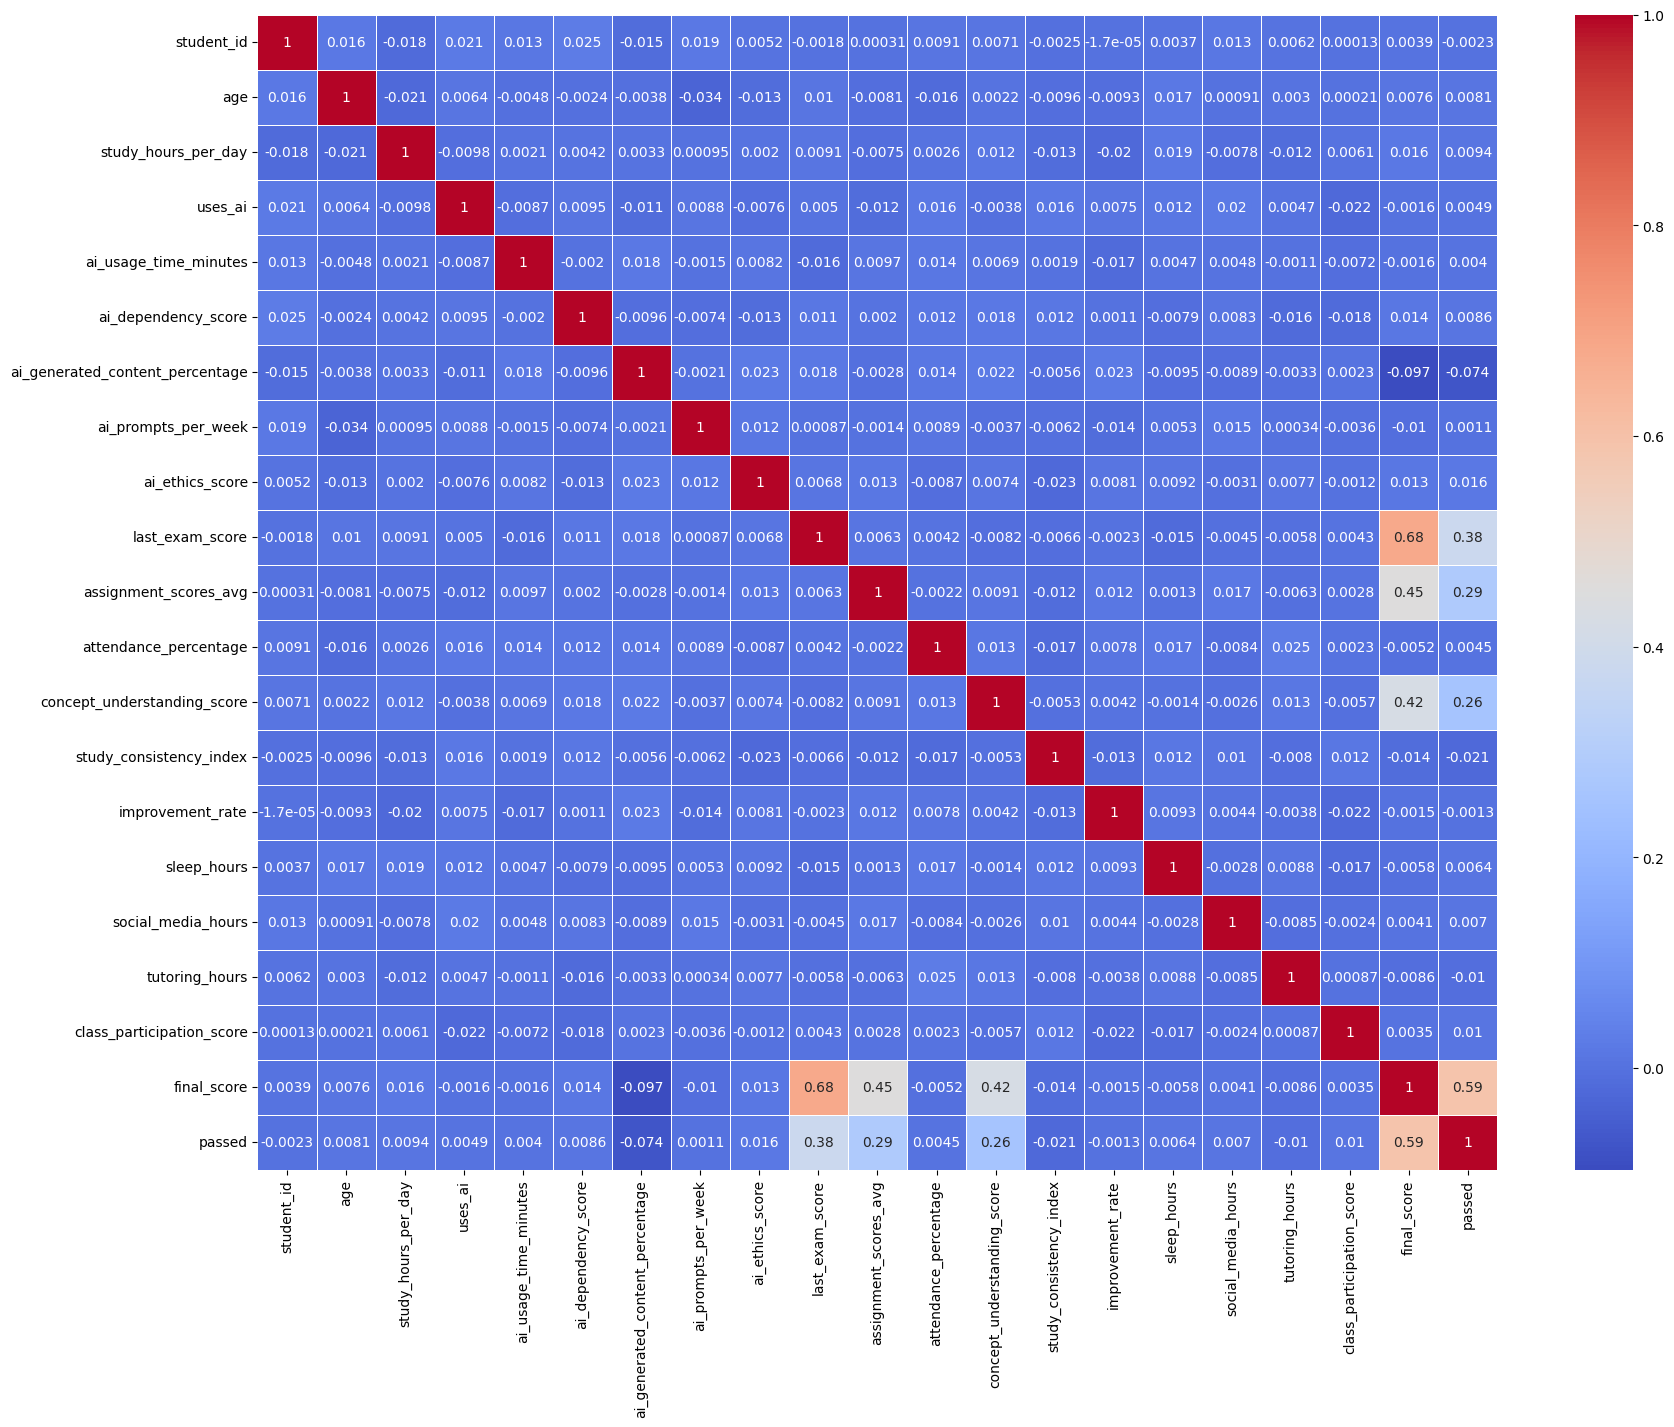

In [18]:
# now make its heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)

# Data Preprocessing

In [19]:
df.isnull().sum()

student_id                            0
age                                   0
gender                                0
grade_level                           0
study_hours_per_day                   0
uses_ai                               0
ai_usage_time_minutes                 0
ai_tools_used                      1362
ai_usage_purpose                   1346
ai_dependency_score                   0
ai_generated_content_percentage       0
ai_prompts_per_week                   0
ai_ethics_score                       0
last_exam_score                       0
assignment_scores_avg                 0
attendance_percentage                 0
concept_understanding_score           0
study_consistency_index               0
improvement_rate                      0
sleep_hours                           0
social_media_hours                    0
tutoring_hours                        0
class_participation_score             0
final_score                           0
passed                                0


In [20]:
df["ai_tools_used"]=df["ai_tools_used"].fillna(df["ai_tools_used"].mode()[0])

In [21]:
df["ai_usage_purpose"]=df["ai_usage_purpose"].fillna(df["ai_usage_purpose"].mode()[0])

In [22]:
df.isnull().sum().sort_values(ascending=False)

student_id                         0
age                                0
gender                             0
grade_level                        0
study_hours_per_day                0
uses_ai                            0
ai_usage_time_minutes              0
ai_tools_used                      0
ai_usage_purpose                   0
ai_dependency_score                0
ai_generated_content_percentage    0
ai_prompts_per_week                0
ai_ethics_score                    0
last_exam_score                    0
assignment_scores_avg              0
attendance_percentage              0
concept_understanding_score        0
study_consistency_index            0
improvement_rate                   0
sleep_hours                        0
social_media_hours                 0
tutoring_hours                     0
class_participation_score          0
final_score                        0
passed                             0
performance_category               0
dtype: int64

In [23]:
df.dtypes

student_id                           int64
age                                  int64
gender                              object
grade_level                         object
study_hours_per_day                float64
uses_ai                              int64
ai_usage_time_minutes                int64
ai_tools_used                       object
ai_usage_purpose                    object
ai_dependency_score                  int64
ai_generated_content_percentage      int64
ai_prompts_per_week                  int64
ai_ethics_score                      int64
last_exam_score                      int64
assignment_scores_avg              float64
attendance_percentage              float64
concept_understanding_score          int64
study_consistency_index            float64
improvement_rate                   float64
sleep_hours                        float64
social_media_hours                 float64
tutoring_hours                     float64
class_participation_score            int64
final_score

# Apply encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])

In [25]:
df.head()

,student_id,age,gender,grade_level,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,...,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category
0,1,20,0,1st Year,2.5,1,170,ChatGPT+Gemini,Exam Prep,10,...,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,Low
1,2,17,1,12th,3.4,1,123,ChatGPT+Gemini,Notes,4,...,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,Medium
2,3,24,1,3rd Year,0.8,0,35,Copilot,Doubt Solving,8,...,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,Medium
3,4,21,0,12th,4.4,0,45,ChatGPT+Gemini,Notes,3,...,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,Medium
4,5,18,2,3rd Year,3.5,1,21,ChatGPT+Gemini,Coding,2,...,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,Low


In [26]:
df["grade_level"].value_counts()

grade_level
1st Year    1356
10th        1344
11th        1336
3rd Year    1334
12th        1321
2nd Year    1309
Name: count, dtype: int64

In [27]:
df = pd.get_dummies(df, columns=["grade_level"], drop_first=True)

In [28]:
df["ai_tool_used"] = le.fit_transform(df["ai_tools_used"])

In [29]:
df["ai_usage_purpose"] = le.fit_transform(df["ai_usage_purpose"])

In [30]:
df["performance_category"] = le.fit_transform(df["performance_category"])

In [31]:
df.head()

,student_id,age,gender,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_tools_used,ai_usage_purpose,ai_dependency_score,ai_generated_content_percentage,...,class_participation_score,final_score,passed,performance_category,grade_level_11th,grade_level_12th,grade_level_1st Year,grade_level_2nd Year,grade_level_3rd Year,ai_tool_used
0,1,20,0,2.5,1,170,ChatGPT+Gemini,2,10,29,...,6,36.8,0,1,False,False,True,False,False,1
1,2,17,1,3.4,1,123,ChatGPT+Gemini,4,4,14,...,6,65.5,1,2,False,True,False,False,False,1
2,3,24,1,0.8,0,35,Copilot,1,8,82,...,3,66.3,1,2,False,False,False,False,True,3
3,4,21,0,4.4,0,45,ChatGPT+Gemini,4,3,74,...,2,69.5,1,2,False,True,False,False,False,1
4,5,18,2,3.5,1,21,ChatGPT+Gemini,0,2,83,...,2,49.7,1,1,False,False,False,False,True,1


In [32]:
# Split the tools by '+' and create a list of tools per row
df["ai_tools_used_list"] = df["ai_tools_used"].str.split('+')

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
encoded_tools = mlb.fit_transform(df["ai_tools_used_list"])

# Create a DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_tools, columns=mlb.classes_, index=df.index)

# Add to original df
df = pd.concat([df.drop(["ai_tools_used", "ai_tools_used_list"], axis=1), encoded_df], axis=1)


In [34]:
df.head()

,student_id,age,gender,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_usage_purpose,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,...,grade_level_11th,grade_level_12th,grade_level_1st Year,grade_level_2nd Year,grade_level_3rd Year,ai_tool_used,ChatGPT,Claude,Copilot,Gemini
0,1,20,0,2.5,1,170,2,10,29,56,...,False,False,True,False,False,1,1,0,0,1
1,2,17,1,3.4,1,123,4,4,14,65,...,False,True,False,False,False,1,1,0,0,1
2,3,24,1,0.8,0,35,1,8,82,8,...,False,False,False,False,True,3,0,0,1,0
3,4,21,0,4.4,0,45,4,3,74,106,...,False,True,False,False,False,1,1,0,0,1
4,5,18,2,3.5,1,21,0,2,83,7,...,False,False,False,False,True,1,1,0,0,1


In [35]:
# convert all bool dtype to int
bool_cols = df.select_dtypes(include=["bool"]).columns
for col in bool_cols:
    df[col] = df[col].astype(int)

In [36]:
df.head()

,student_id,age,gender,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_usage_purpose,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,...,grade_level_11th,grade_level_12th,grade_level_1st Year,grade_level_2nd Year,grade_level_3rd Year,ai_tool_used,ChatGPT,Claude,Copilot,Gemini
0,1,20,0,2.5,1,170,2,10,29,56,...,0,0,1,0,0,1,1,0,0,1
1,2,17,1,3.4,1,123,4,4,14,65,...,0,1,0,0,0,1,1,0,0,1
2,3,24,1,0.8,0,35,1,8,82,8,...,0,0,0,0,1,3,0,0,1,0
3,4,21,0,4.4,0,45,4,3,74,106,...,0,1,0,0,0,1,1,0,0,1
4,5,18,2,3.5,1,21,0,2,83,7,...,0,0,0,0,1,1,1,0,0,1


In [37]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day', 'uses_ai',
       'ai_usage_time_minutes', 'ai_usage_purpose', 'ai_dependency_score',
       'ai_generated_content_percentage', 'ai_prompts_per_week',
       'ai_ethics_score', 'last_exam_score', 'assignment_scores_avg',
       'attendance_percentage', 'concept_understanding_score',
       'study_consistency_index', 'improvement_rate', 'sleep_hours',
       'social_media_hours', 'tutoring_hours', 'class_participation_score',
       'final_score', 'passed', 'performance_category', 'grade_level_11th',
       'grade_level_12th', 'grade_level_1st Year', 'grade_level_2nd Year',
       'grade_level_3rd Year', 'ai_tool_used', 'ChatGPT', 'Claude', 'Copilot',
       'Gemini'],
      dtype='object')

In [38]:
df.head() 

,student_id,age,gender,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_usage_purpose,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,...,grade_level_11th,grade_level_12th,grade_level_1st Year,grade_level_2nd Year,grade_level_3rd Year,ai_tool_used,ChatGPT,Claude,Copilot,Gemini
0,1,20,0,2.5,1,170,2,10,29,56,...,0,0,1,0,0,1,1,0,0,1
1,2,17,1,3.4,1,123,4,4,14,65,...,0,1,0,0,0,1,1,0,0,1
2,3,24,1,0.8,0,35,1,8,82,8,...,0,0,0,0,1,3,0,0,1,0
3,4,21,0,4.4,0,45,4,3,74,106,...,0,1,0,0,0,1,1,0,0,1
4,5,18,2,3.5,1,21,0,2,83,7,...,0,0,0,0,1,1,1,0,0,1


In [39]:
import pandas as pd

# Make pandas show all columns
pd.set_option('display.max_columns', None)

# Now when you print df.head(), all columns will appear
print(df.head())

   student_id  age  gender  study_hours_per_day  uses_ai  \
0           1   20       0                  2.5        1   
1           2   17       1                  3.4        1   
2           3   24       1                  0.8        0   
3           4   21       0                  4.4        0   
4           5   18       2                  3.5        1   

   ai_usage_time_minutes  ai_usage_purpose  ai_dependency_score  \
0                    170                 2                   10   
1                    123                 4                    4   
2                     35                 1                    8   
3                     45                 4                    3   
4                     21                 0                    2   

   ai_generated_content_percentage  ai_prompts_per_week  ai_ethics_score  \
0                               29                   56                5   
1                               14                   65                1   
2       

In [40]:
df.head()

,student_id,age,gender,study_hours_per_day,uses_ai,ai_usage_time_minutes,ai_usage_purpose,ai_dependency_score,ai_generated_content_percentage,ai_prompts_per_week,ai_ethics_score,last_exam_score,assignment_scores_avg,attendance_percentage,concept_understanding_score,study_consistency_index,improvement_rate,sleep_hours,social_media_hours,tutoring_hours,class_participation_score,final_score,passed,performance_category,grade_level_11th,grade_level_12th,grade_level_1st Year,grade_level_2nd Year,grade_level_3rd Year,ai_tool_used,ChatGPT,Claude,Copilot,Gemini
0,1,20,0,2.5,1,170,2,10,29,56,5,29,40.9,98.8,4,9.0,8.1,7.2,1.5,4.6,6,36.8,0,1,0,0,1,0,0,1,1,0,0,1
1,2,17,1,3.4,1,123,4,4,14,65,1,60,87.2,89.3,8,8.5,13.8,7.6,5.1,2.7,6,65.5,1,2,0,1,0,0,0,1,1,0,0,1
2,3,24,1,0.8,0,35,1,8,82,8,5,98,77.1,50.8,7,2.1,39.1,5.7,0.2,4.0,3,66.3,1,2,0,0,0,0,1,3,0,0,1,0
3,4,21,0,4.4,0,45,4,3,74,106,10,67,86.4,52.1,5,6.7,25.2,8.2,4.2,2.9,2,69.5,1,2,0,1,0,0,0,1,1,0,0,1
4,5,18,2,3.5,1,21,0,2,83,7,10,40,69.4,40.7,5,5.4,2.7,8.7,0.2,2.9,2,49.7,1,1,0,0,0,0,1,1,1,0,0,1


In [41]:
X = df.drop(columns=['final_score', 'passed', 'performance_category'])
y = df['final_score']

# Model Creation

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [44]:
y_pred = model_1.predict(X_test)

In [45]:
# import regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 3.8863351727432707
Mean Squared Error: 24.080745586477207
R^2 Score: 0.8705160978552121


In [46]:
# now use random forest regressor
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor(random_state=42)
model_2.fit(X_train, y_train)
y_pred_rf = model_2.predict(X_test)

In [47]:
# now check performance of random forest regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor Performance:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R^2 Score:", r2_rf)

Random Forest Regressor Performance:
Mean Absolute Error: 4.106425000000001
Mean Squared Error: 26.777549055000005
R^2 Score: 0.8560151915120953


# Now predict new student

In [48]:
import pandas as pd

# --------------------------
# Features your model_2 was actually trained on
feature_columns = [
    'student_id', 'age', 'gender', 'study_hours_per_day', 'uses_ai',
    'ai_usage_time_minutes', 'ai_usage_purpose', 'ai_dependency_score',
    'ai_generated_content_percentage', 'ai_prompts_per_week',
    'ai_ethics_score', 'last_exam_score', 'assignment_scores_avg',
    'attendance_percentage', 'concept_understanding_score',
    'study_consistency_index', 'improvement_rate', 'sleep_hours',
    'social_media_hours', 'tutoring_hours', 'class_participation_score',
    'grade_level_11th', 'grade_level_12th', 'grade_level_1st Year',
    'grade_level_2nd Year', 'grade_level_3rd Year', 'ai_tool_used',
    'ChatGPT', 'Claude', 'Copilot', 'Gemini'
]

# --------------------------
# Function to predict final_score
def predict_final_score(new_student_data, model, feature_columns):
    # Convert input dict to DataFrame
    new_student_df = pd.DataFrame([new_student_data])
    
    # Make sure all columns match training features
    new_student_df = new_student_df.reindex(columns=feature_columns, fill_value=0)
    
    # Predict
    predicted_score = model.predict(new_student_df)[0]
    return predicted_score

# --------------------------
# Example new student input
new_student_input = {
    'age': 20,
    'gender': 0,
    'study_hours_per_day': 3.5,
    'uses_ai': 1,
    'ai_usage_time_minutes': 90,
    'ai_usage_purpose': 2,
    'ai_dependency_score': 7,
    'ai_generated_content_percentage': 25,
    'ai_prompts_per_week': 40,
    'ai_ethics_score': 8,
    'last_exam_score': 80,
    'assignment_scores_avg': 82,
    'attendance_percentage': 95,
    'concept_understanding_score': 85,
    'study_consistency_index': 7,
    'improvement_rate': 6,
    'sleep_hours': 7,
    'social_media_hours': 2,
    'tutoring_hours': 1,
    'class_participation_score': 9,
    'grade_level_11th': 0,
    'grade_level_12th': 0,
    'grade_level_1st Year': 1,
    'grade_level_2nd Year': 0,
    'grade_level_3rd Year': 0,
    'ai_tool_used': 1,
    'ChatGPT': 1,
    'Claude': 0,
    'Copilot': 0,
    'Gemini': 0
}

# --------------------------
# Predict final_score using model_2
predicted_score = predict_final_score(new_student_input, model_2, feature_columns)
print("Predicted final_score:", predicted_score)


Predicted final_score: 79.11599999999997
